# Classifier name 

Step -1 :import datascience libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step-2: Load Dataset**

### Attribute Information:

0. sepal length in cm 
1. sepal width in cm 
2. petal length in cm 
3. petal width in cm 
4. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [4]:
dataset = pd.read_csv('irir.csv',header =None)
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Any missing values replace or drop it **

dataset.dropna(axis =0)

**Step - 3 : Dataframe into array --> Data Preprocessing**
    - independent 
    - dependent

In [8]:
X = dataset.iloc[:,[0,2]].values # independent variable # sepal leng and petal leng
y = dataset.iloc[:,-1].values # dependent variable

**Check categroial data**

In [6]:
# if yes
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [11]:
y = label.fit_transform(y)

### Feature Scaling (Normalizing )

In [14]:
from sklearn.preprocessing import StandardScaler
# should always apply to indepedent variables

*** don't apply Standardscaler to dependent variable**

In [15]:
sc = StandardScaler()

In [16]:
X_new = sc.fit_transform(X) # pass to an independent variable

**visualize data**

In [19]:
plt.style.use('fivethirtyeight')

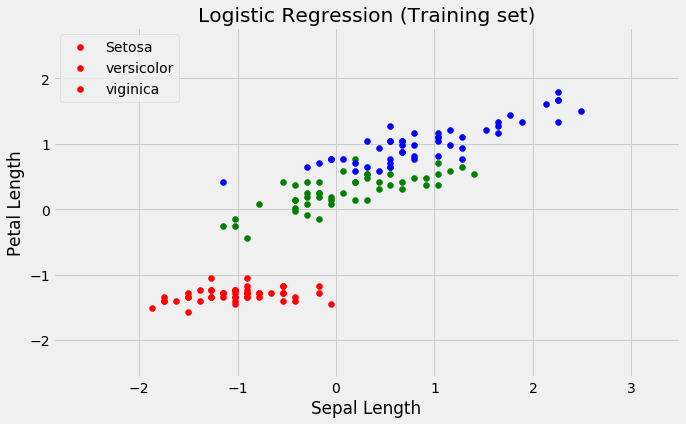

In [20]:
plt.figure(figsize=(10,6))
X_set, y_set = X_new, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Logistic Regression (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(['Setosa','versicolor','viginica'])
plt.show()

** Step 4 Splitting Data into traning and testing **

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
x_train , x_test, y_train, y_test = train_test_split(X_new, y,
                                                     test_size = 0.2,
                                                    random_state = 0)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

### Step 5:  Building Machine Learning classifier or model

In [25]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(C = 10.0) # captial "C"

traning model

In [41]:
model.fit(x_train, y_train) # training model

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Step -6 :Evaluation model**

In [42]:
y_pred = model.predict(x_test) # we use this for evaluation
y_prob = model.predict_proba(x_test) # probability score

***classification metrics**

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
cm = confusion_matrix(y_test, y_pred) # confusion matrix
cr = classification_report(y_test, y_pred) # classification report

In [45]:
import seaborn as sns

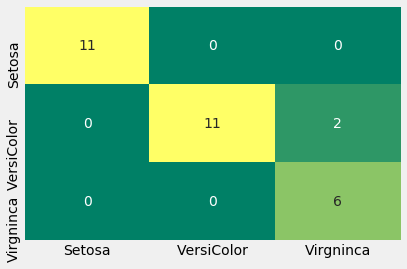

In [46]:
sns.heatmap(cm,annot=True,cbar=None,
            xticklabels=['Setosa','VersiColor','Virgninca'],
           yticklabels=['Setosa','VersiColor','Virgninca'],cmap = 'summer')

In [47]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.85      0.92        13
          2       0.75      1.00      0.86         6

avg / total       0.95      0.93      0.94        30



****Visualize final classication***

In [48]:
from matplotlib.colors import ListedColormap

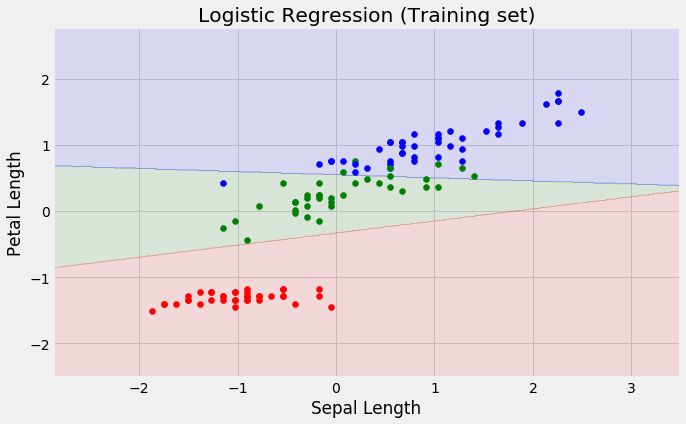

In [49]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_train, y_train


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Logistic Regression (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
#plt.legend()
plt.show()